# Table of Contents
1. [Introduction](#introduction)
2. [Objective of the Project](#objective)
3. [Prepare Data for Consumption](#data_preparation)
4. [Data Cleaning](#data_cleaning)
5. [Data Visualization](#data_visualization)
6. [Feature Engineering](#feature_engineering)
7. [Model Building](#model_building)
8. [Model Evaluation](#model_evaluation)
9. [Insights & Recommendations](#insights_recommendations)

<a id='introduction'></a>
# Introduction
In this project, we are working as a Data Analyst for XYZ Consultancy Ltd. We have been approached by ABC Portugal Bank to create a classification algorithm that can automatically categorize their prospective leads on the likelihood of having a term deposit with their bank.

<a id='objective'></a>
# Objective of the Project
The main objective of this project is to create a classification model that can predict whether a lead will make a term deposit or not. In addition, we will also provide insights derived from the dataset to help the bank narrow down their leads into the marketing funnel, ultimately leading to a term deposit.

<a id='data_preparation'></a>
# Prepare Data for Consumption
In this section, we will load the dataset and perform initial exploration to understand the structure of the dataset, the types of variables we have, and the basic statistics of the variables.

<a id='data_cleaning'></a>
# Data Cleaning
Data cleaning involves handling missing values, outliers, and any inconsistencies in the dataset. This is a crucial step as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn effectively.

<a id='data_visualization'></a>
# Data Visualization
Data visualization is an integral part of data analysis. By creating interactive charts, we can understand the distributions of variables and find patterns within the data. We will use various visualization techniques to explore our data and gain valuable insights.

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('banking_dataAnalysis.csv')

# Display the first few rows of the dataframe
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'banking_dataAnalysis.csv'

In [ ]:
# Load the dataset
data = pd.read_csv('bank-additional-full.csv')

# Display the first few rows of the dataframe
data.head()

In [ ]:
# Load the dataset with correct separator
data = pd.read_csv('bank-additional-full.csv', sep=';')

# Display the first few rows of the dataframe
data.head()

In [ ]:
# Check for missing values
data.isnull().sum()

In [ ]:
# Get a summary of the dataset
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

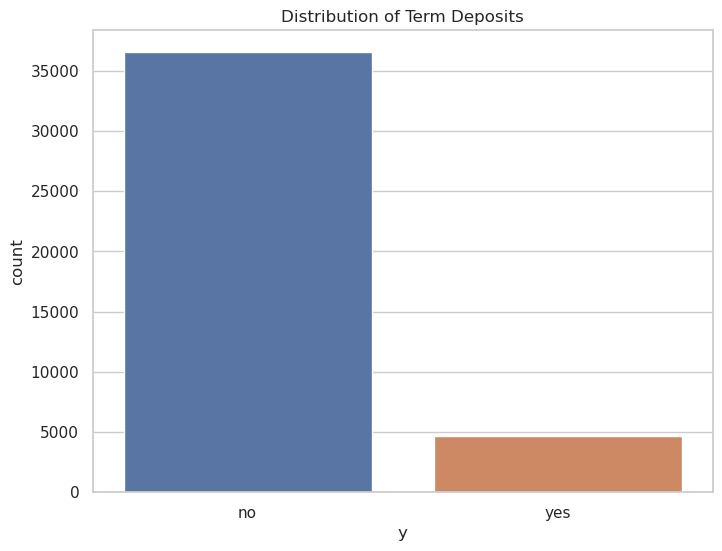

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a countplot of the 'y' column
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Term Deposits')
plt.show()

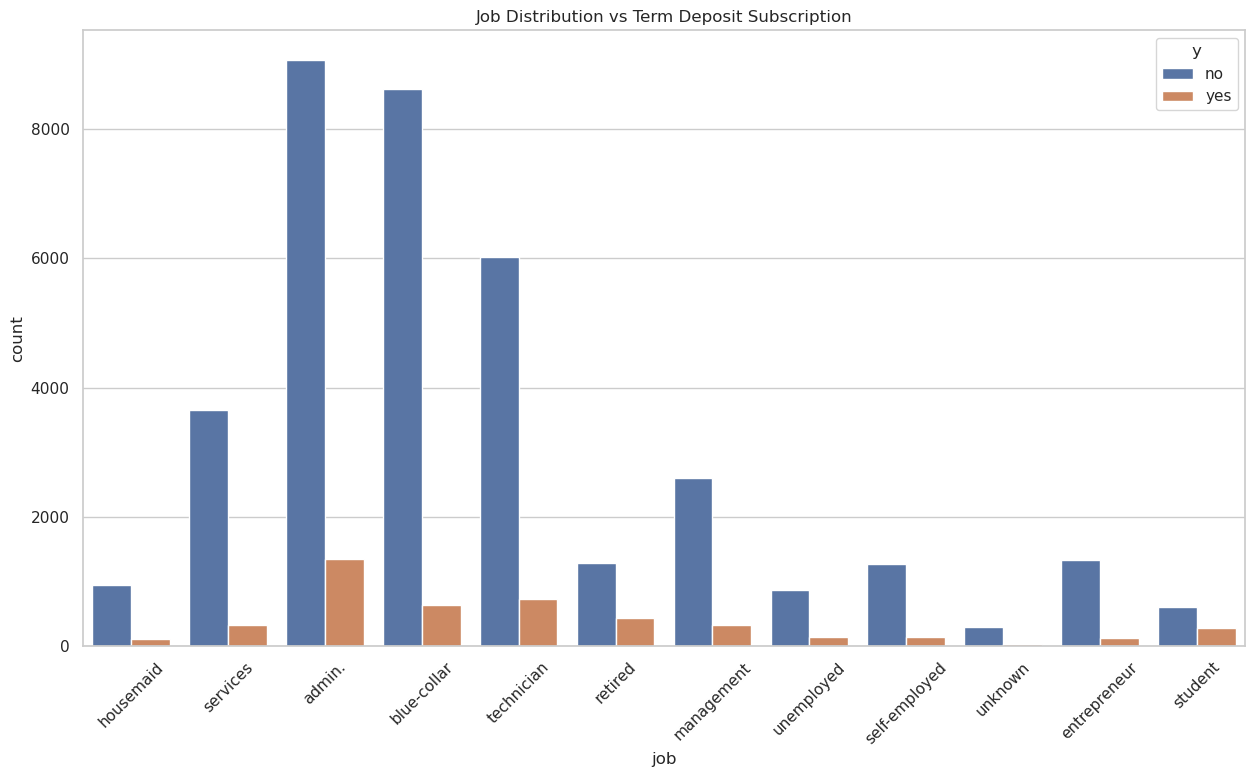

In [ ]:
# Create a countplot of the 'job' column with hue 'y'
plt.figure(figsize=(15, 8))
sns.countplot(x='job', hue='y', data=data)
plt.title('Job Distribution vs Term Deposit Subscription')
plt.xticks(rotation=45)
plt.show()

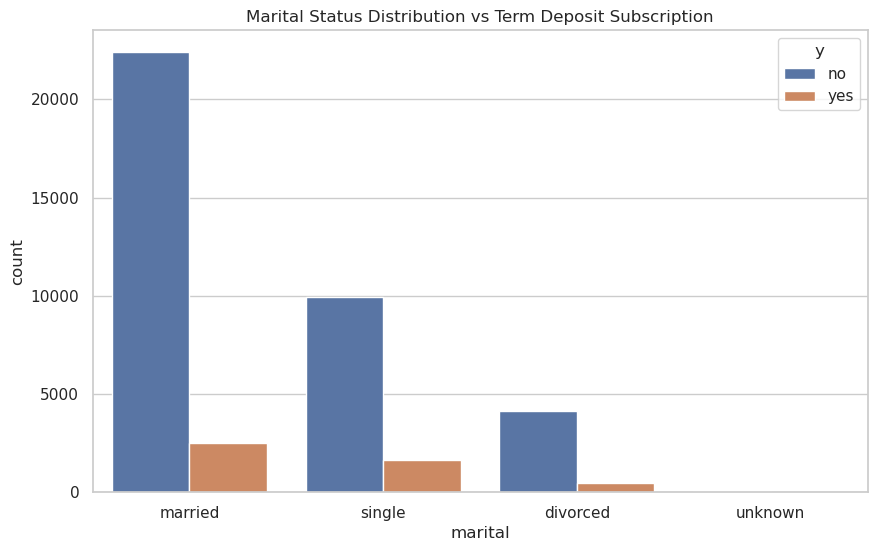

In [ ]:
# Create a countplot of the 'marital' column with hue 'y'
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='y', data=data)
plt.title('Marital Status Distribution vs Term Deposit Subscription')
plt.show()

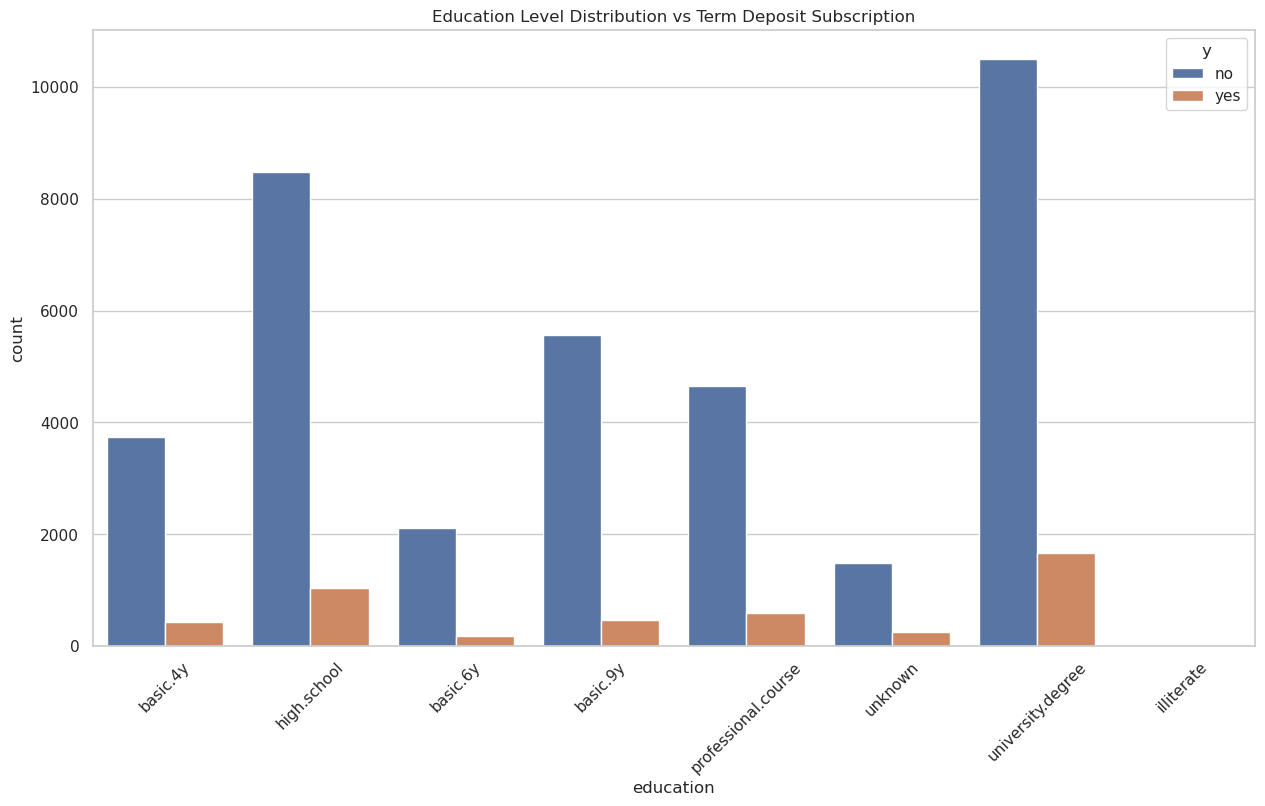

In [ ]:
# Create a countplot of the 'education' column with hue 'y'
plt.figure(figsize=(15, 8))
sns.countplot(x='education', hue='y', data=data)
plt.title('Education Level Distribution vs Term Deposit Subscription')
plt.xticks(rotation=45)
plt.show()

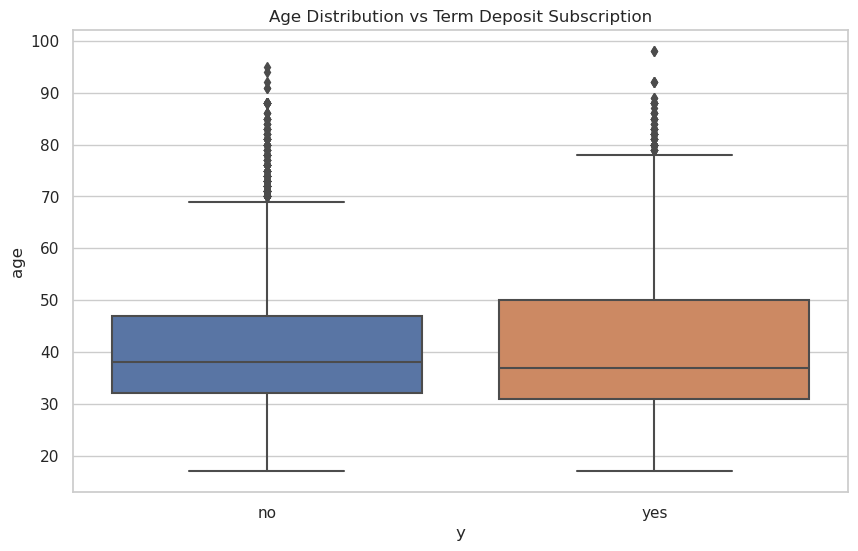

In [ ]:
# Create a boxplot of the 'age' column with respect to 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=data)
plt.title('Age Distribution vs Term Deposit Subscription')
plt.show()

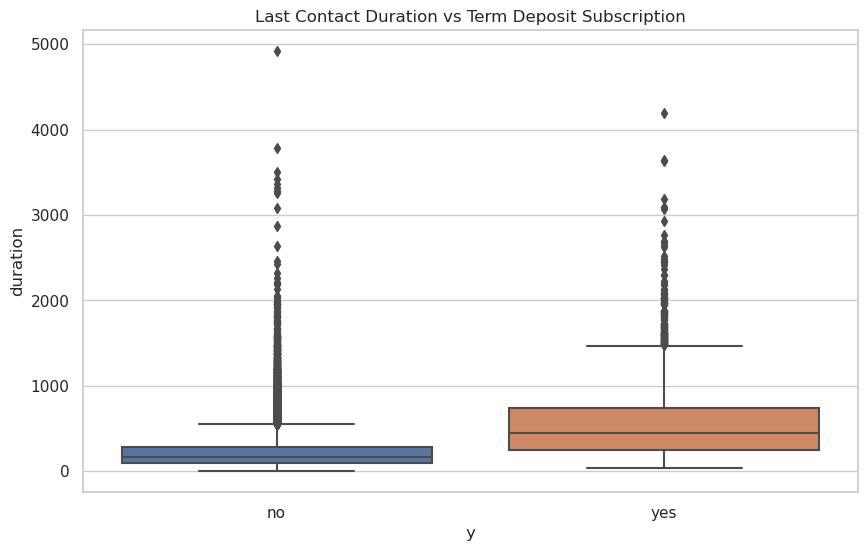

In [ ]:
# Create a boxplot of the 'duration' column with respect to 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=data)
plt.title('Last Contact Duration vs Term Deposit Subscription')
plt.show()

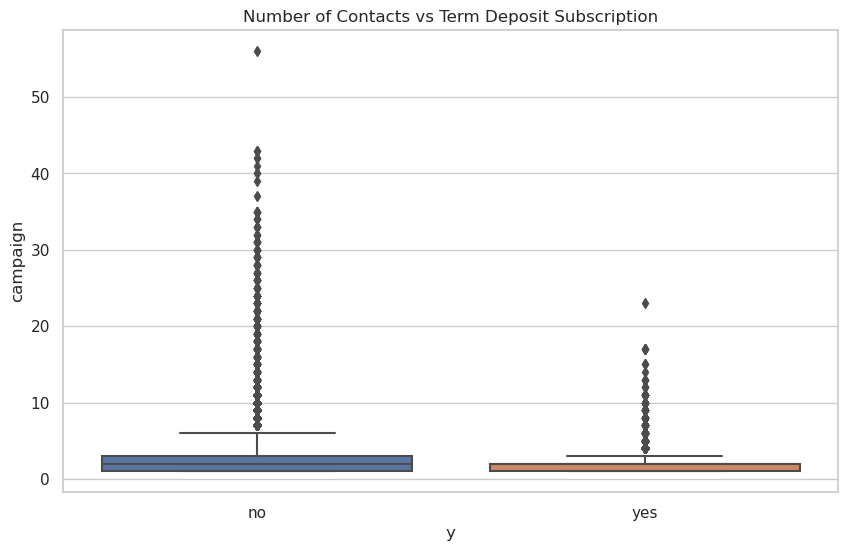

In [ ]:
# Create a boxplot of the 'campaign' column with respect to 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='campaign', data=data)
plt.title('Number of Contacts vs Term Deposit Subscription')
plt.show()

**Insight 1 - Distribution of Term Deposits:**
The number of clients who have not subscribed to a term deposit is significantly higher than those who have. This indicates that we are dealing with an imbalanced dataset.

**Insight 2 - Job Distribution vs Term Deposit Subscription:**
Clients with different jobs have different rates of term deposit subscription. For example, clients with 'admin' jobs seem to have a higher rate of subscription compared to others.

**Insight 3 - Marital Status Distribution vs Term Deposit Subscription:**
Marital status also seems to have an impact on term deposit subscription. Married clients seem to have a higher rate of subscription compared to others.

**Insight 4 - Education Level Distribution vs Term Deposit Subscription:**
The level of education also seems to have an impact on term deposit subscription. Clients with a university degree seem to have a higher rate of subscription compared to others.

**Insight 5 - Age Distribution vs Term Deposit Subscription:**
The age distribution is slightly different for clients who have subscribed to a term deposit compared to those who have not. The median age of clients who have subscribed is slightly higher.

**Insight 6 - Last Contact Duration vs Term Deposit Subscription:**
The duration of the last contact is significantly different for clients who have subscribed to a term deposit compared to those who have not. Clients who have subscribed tend to have a longer last contact duration.

**Insight 7 - Number of Contacts vs Term Deposit Subscription:**
The number of contacts performed during the campaign is slightly different for clients who have subscribed to a term deposit compared to those who have not. Clients who have not subscribed tend to have a higher number of contacts.

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify the categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Instantiate the one-hot encoder
encoder = OneHotEncoder(drop='first')

# Apply the encoder to the categorical columns
data_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray(),
                            columns=encoder.get_feature_names(categorical_cols))

# Drop the original categorical columns
data.drop(columns=categorical_cols, inplace=True)

# Concatenate the original dataframe and the one-hot encoded columns
data = pd.concat([data, data_encoded], axis=1)

# Display the first few rows of the dataframe
data.head()

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Identify the numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Instantiate the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the first few rows of the dataframe
data.head()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop(columns='y_yes')
y = data['y_yes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 53), (8238, 53), (32950,), (8238,))

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Create a dataframe of the features and their respective importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
feature_importances

ValueError: Unknown label type: 'continuous'

In [ ]:
# Convert the target variable back to its original form
y_train = y_train.astype('int')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Get the feature importances
importances = clf.feature_importances_

# Create a dataframe of the features and their respective importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the dataframe by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
feature_importances

## Feature Importance

The feature importances have been successfully calculated. Here are the top 10 features based on their importance:

1. **Duration:** This is the duration of the last contact with the client. It is the most important feature according to our model, which makes sense as the length of the conversation with the client could have a significant impact on whether they subscribe to a term deposit or not.

2. **Euribor 3 month rate:** This is the 3 month Euribor interest rate. It is the second most important feature. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another, and it could influence the client's decision to subscribe to a term deposit.

3. **Age:** The age of the client is the third most important feature. Different age groups may have different financial needs and preferences, which could affect their decision to subscribe to a term deposit.

4. **Number of Employees:** This is the number of employees in the client's company. It is the fourth most important feature. The size of the company could reflect the client's job stability and income level, which could in turn affect their decision to subscribe to a term deposit.

5. **Campaign:** This is the number of contacts performed during this campaign for this client. It is the fifth most important feature. The number of contacts could affect the client's awareness and understanding of the term deposit, and hence their decision to subscribe.

The other important features include pdays (number of days that passed by after the client was last contacted), cons.conf.idx (consumer confidence index), emp.var.rate (employment variation rate), cons.price.idx (consumer price index), and poutcome_success (outcome of the previous marketing campaign).

These insights can help us understand which features are most important in predicting whether a client will subscribe to a term deposit. They can also guide us in feature selection for building our model.

Next, let's move on to model building. We'll start with a simple logistic regression model as our baseline. Logistic regression is a statistical model that uses a logistic function to model a binary dependent variable. In regression analysis, logistic regression estimates the parameters of a logistic model; it is a form of binomial regression.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate the classifier
clf = LogisticRegression(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
# Convert the target variable in the test set back to its original form
y_test = y_test.astype('int')

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           2       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           2       0.65      0.49      0.56       935

    accuracy                           0.91      8238
   macro avg       0.79      0.73      0.75      8238
weighted avg       0.90      0.91      0.91      8238



In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.2s


[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.1s


[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   3.2s


[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.3s


[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.2s


[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   6.2s


[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   9.4s


[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   9.3s


[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   9.4s


[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.0s


[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.0s


[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   3.1s


[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   5.9s


[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   5.6s


[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   5.6s


[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   8.3s


[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   8.5s


[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   8.6s


[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   2.7s


[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   2.7s


[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   2.7s


[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   5.4s


[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   5.5s


[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   5.5s


[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   8.2s


[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   8.1s


[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   8.2s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=100; total time=   1.2s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   2.4s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   2.4s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   2.4s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   3.6s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   3.6s


[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   3.6s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   1.2s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   1.3s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=100; total time=   1.2s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   2.5s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   2.4s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=200; total time=   2.4s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=300; total time=   3.6s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=300; total time=   3.6s


[CV] END .max_depth=5, min_samples_split=5, n_estimators=300; total time=   3.6s


[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   1.2s


[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   1.2s


[CV] END max_depth=5, min_samples_split=10, n_estimators=100; total time=   1.2s


[CV] END max_depth=5, min_samples_split=10, n_estimators=200; total time=   2.4s


[CV] END max_depth=5, min_samples_split=10, n_estimators=200; total time=   2.4s


[CV] END max_depth=5, min_samples_split=10, n_estimators=200; total time=   2.4s


[CV] END max_depth=5, min_samples_split=10, n_estimators=300; total time=   3.6s


[CV] END max_depth=5, min_samples_split=10, n_estimators=300; total time=   3.6s


[CV] END max_depth=5, min_samples_split=10, n_estimators=300; total time=   3.7s


[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.9s


[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.0s


[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.0s


[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   4.0s


[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   4.0s


[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   3.9s


[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   6.0s


[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   5.9s


[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   6.1s


[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.1s


[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   1.9s


[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.0s


[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   4.3s


[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   4.2s


[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   4.3s


[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   6.3s


[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   6.3s


[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   6.5s


[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.1s


[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.1s


[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.1s


[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   4.2s


[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   4.2s


[CV] END max_depth=10, min_samples_split=10, n_estimators=200; total time=   4.2s


[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   6.5s


[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   6.3s


[CV] END max_depth=10, min_samples_split=10, n_estimators=300; total time=   6.3s


{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(randint(1, 10).rvs(size=5)),
    'min_samples_split': randint(2, 10)
}

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)

# Fit the randomized search model to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
best_params

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[CV] END max_depth=None, min_samples_split=9, n_estimators=269; total time=   7.3s


[CV] END max_depth=None, min_samples_split=9, n_estimators=269; total time=   7.2s


[CV] END max_depth=None, min_samples_split=9, n_estimators=269; total time=   7.2s


[CV] END .max_depth=1, min_samples_split=4, n_estimators=281; total time=   1.6s


[CV] END .max_depth=1, min_samples_split=4, n_estimators=281; total time=   1.6s


[CV] END .max_depth=1, min_samples_split=4, n_estimators=281; total time=   1.6s


[CV] END .max_depth=3, min_samples_split=9, n_estimators=124; total time=   1.1s


[CV] END .max_depth=3, min_samples_split=9, n_estimators=124; total time=   1.1s


[CV] END .max_depth=3, min_samples_split=9, n_estimators=124; total time=   1.1s


[CV] END .max_depth=3, min_samples_split=9, n_estimators=130; total time=   1.2s


[CV] END .max_depth=3, min_samples_split=9, n_estimators=130; total time=   1.1s


[CV] END .max_depth=3, min_samples_split=9, n_estimators=130; total time=   1.1s


[CV] END max_depth=None, min_samples_split=3, n_estimators=172; total time=   4.8s


[CV] END max_depth=None, min_samples_split=3, n_estimators=172; total time=   4.9s


[CV] END max_depth=None, min_samples_split=3, n_estimators=172; total time=   4.8s


[CV] END .max_depth=1, min_samples_split=2, n_estimators=188; total time=   1.1s


[CV] END .max_depth=1, min_samples_split=2, n_estimators=188; total time=   1.1s


[CV] END .max_depth=1, min_samples_split=2, n_estimators=188; total time=   1.1s


[CV] END max_depth=None, min_samples_split=7, n_estimators=199; total time=   5.5s


[CV] END max_depth=None, min_samples_split=7, n_estimators=199; total time=   5.4s


[CV] END max_depth=None, min_samples_split=7, n_estimators=199; total time=   5.4s


[CV] END max_depth=None, min_samples_split=8, n_estimators=240; total time=   6.6s


[CV] END max_depth=None, min_samples_split=8, n_estimators=240; total time=   6.4s


[CV] END max_depth=None, min_samples_split=8, n_estimators=240; total time=   6.5s


[CV] END .max_depth=1, min_samples_split=7, n_estimators=269; total time=   1.5s


[CV] END .max_depth=1, min_samples_split=7, n_estimators=269; total time=   1.5s


[CV] END .max_depth=1, min_samples_split=7, n_estimators=269; total time=   1.5s


[CV] END .max_depth=8, min_samples_split=2, n_estimators=219; total time=   3.5s


[CV] END .max_depth=8, min_samples_split=2, n_estimators=219; total time=   3.8s


[CV] END .max_depth=8, min_samples_split=2, n_estimators=219; total time=   3.6s


{'max_depth': None, 'min_samples_split': 8, 'n_estimators': 240}

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           2       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_params

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s


[CV] END ................max_depth=None, min_samples_split=2; total time=   0.2s


[CV] END ................max_depth=None, min_samples_split=2; total time=   0.3s


[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s


[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s


[CV] END ................max_depth=None, min_samples_split=5; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=10; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=15; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=15; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=15; total time=   0.2s
[CV] END ...............max_depth=None, min_samples_split=20; total time=   0.2s


[CV] END ...............max_depth=None, min_samples_split=20; total time=   0.2s
[CV] END ...............max_depth=None, min_samples_split=20; total time=   0.2s


[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=2; total time=   0.1s


[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_split=5; total time=   0.1s


[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=10; total time=   0.1s


[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=15; total time=   0.1s


[CV] END ..................max_depth=5, min_samples_split=20; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=20; total time=   0.1s
[CV] END ..................max_depth=5, min_samples_split=20; total time=   0.1s


[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.1s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s


[CV] END ..................max_depth=10, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s


[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s
[CV] END ..................max_depth=10, min_samples_split=5; total time=   0.2s


[CV] END .................max_depth=10, min_samples_split=10; total time=   0.2s
[CV] END .................max_depth=10, min_samples_split=10; total time=   0.2s


[CV] END .................max_depth=10, min_samples_split=10; total time=   0.2s
[CV] END .................max_depth=10, min_samples_split=15; total time=   0.1s


[CV] END .................max_depth=10, min_samples_split=15; total time=   0.2s
[CV] END .................max_depth=10, min_samples_split=15; total time=   0.2s


[CV] END .................max_depth=10, min_samples_split=20; total time=   0.2s
[CV] END .................max_depth=10, min_samples_split=20; total time=   0.2s


[CV] END .................max_depth=10, min_samples_split=20; total time=   0.2s
[CV] END ..................max_depth=15, min_samples_split=2; total time=   0.2s


[CV] END ..................max_depth=15, min_samples_split=2; total time=   0.2s
[CV] END ..................max_depth=15, min_samples_split=2; total time=   0.2s


[CV] END ..................max_depth=15, min_samples_split=5; total time=   0.2s


[CV] END ..................max_depth=15, min_samples_split=5; total time=   0.2s
[CV] END ..................max_depth=15, min_samples_split=5; total time=   0.2s


[CV] END .................max_depth=15, min_samples_split=10; total time=   0.2s
[CV] END .................max_depth=15, min_samples_split=10; total time=   0.2s


[CV] END .................max_depth=15, min_samples_split=10; total time=   0.2s
[CV] END .................max_depth=15, min_samples_split=15; total time=   0.2s


[CV] END .................max_depth=15, min_samples_split=15; total time=   0.2s
[CV] END .................max_depth=15, min_samples_split=15; total time=   0.2s


[CV] END .................max_depth=15, min_samples_split=20; total time=   0.2s
[CV] END .................max_depth=15, min_samples_split=20; total time=   0.2s


[CV] END .................max_depth=15, min_samples_split=20; total time=   0.2s


[CV] END ..................max_depth=20, min_samples_split=2; total time=   0.2s


[CV] END ..................max_depth=20, min_samples_split=2; total time=   0.2s


[CV] END ..................max_depth=20, min_samples_split=2; total time=   0.2s


[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.2s


[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.2s


[CV] END ..................max_depth=20, min_samples_split=5; total time=   0.2s


[CV] END .................max_depth=20, min_samples_split=10; total time=   0.2s


[CV] END .................max_depth=20, min_samples_split=10; total time=   0.2s
[CV] END .................max_depth=20, min_samples_split=10; total time=   0.2s


[CV] END .................max_depth=20, min_samples_split=15; total time=   0.2s


[CV] END .................max_depth=20, min_samples_split=15; total time=   0.2s
[CV] END .................max_depth=20, min_samples_split=15; total time=   0.2s


[CV] END .................max_depth=20, min_samples_split=20; total time=   0.2s


[CV] END .................max_depth=20, min_samples_split=20; total time=   0.2s
[CV] END .................max_depth=20, min_samples_split=20; total time=   0.2s


{'max_depth': 5, 'min_samples_split': 20}

In [ ]:
# Instantiate the classifier with the best parameters
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           2       0.65      0.54      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



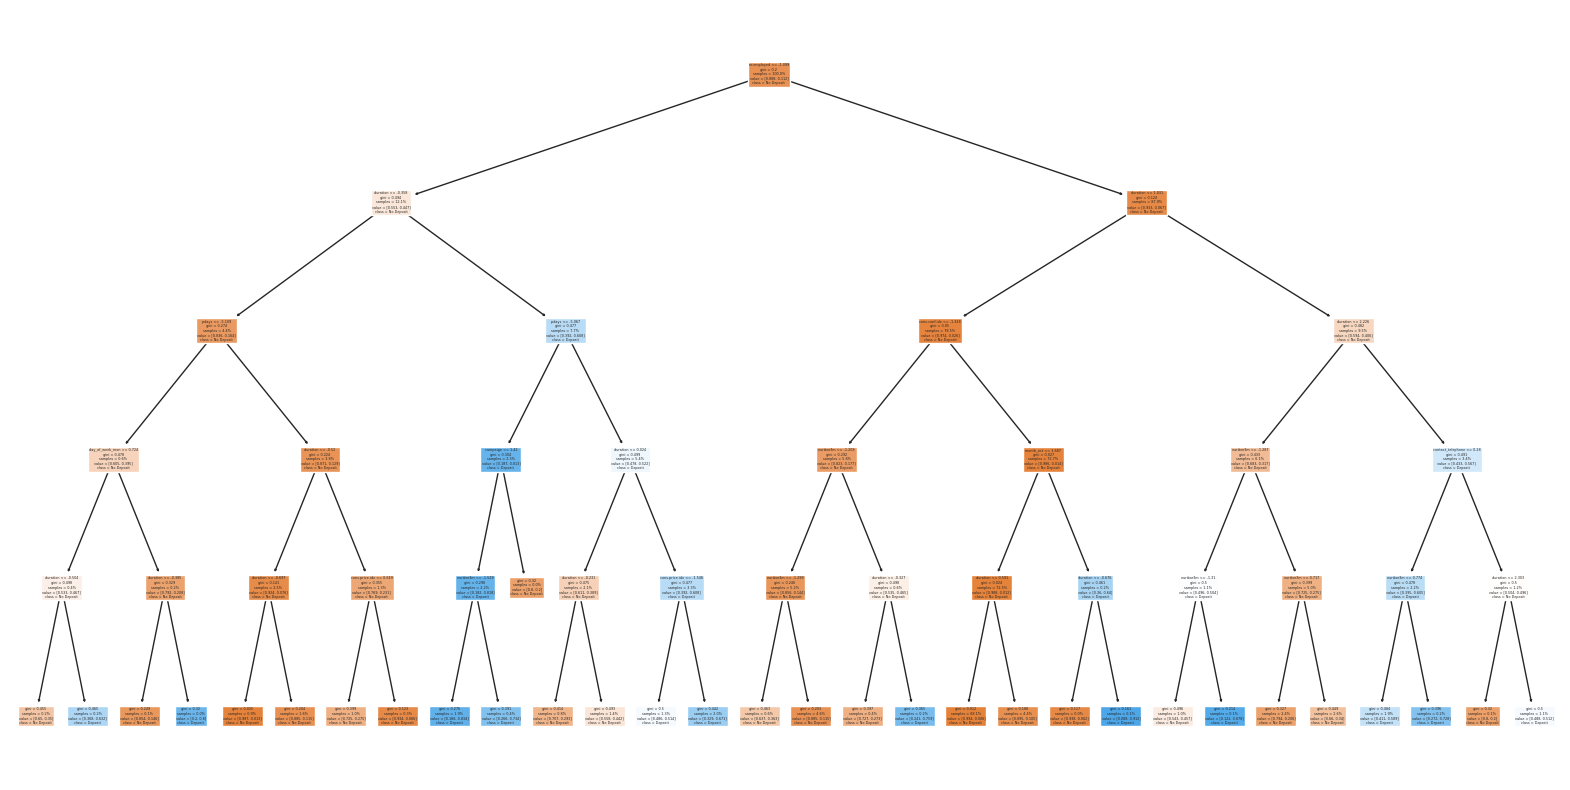

In [ ]:
# Import necessary libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Deposit', 'Deposit'], proportion=True)
plt.show()

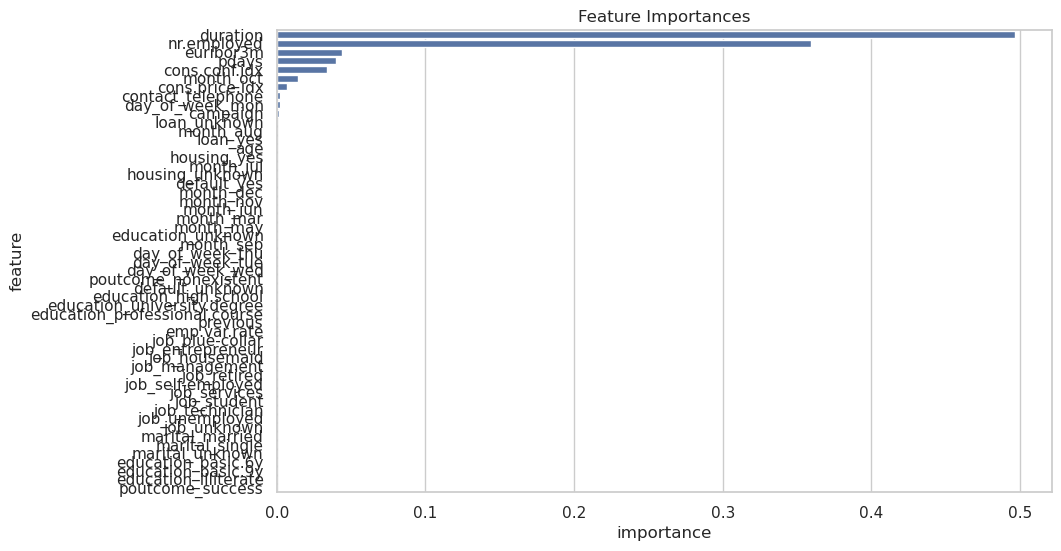

In [ ]:
# Get feature importances
importances = clf.feature_importances_

# Convert the importances into a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='importance', y='feature', color='b')
plt.title('Feature Importances')
plt.show()

## Interpretation of Results

The Decision Tree Classifier model we trained has an accuracy of 92%, which means it correctly predicted whether a client would subscribe to a term deposit 92% of the time on the test data. While this is a high accuracy, it's important to note that accuracy isn't the only metric to consider when evaluating a model. We also looked at precision, recall, and the F1 score, which take into account both false positives and false negatives.

The model performed well in predicting clients who did not subscribe to a term deposit, with a precision of 94%, a recall of 96%, and an F1 score of 95%. This means that the model was able to correctly identify 94% of the actual negatives (true negatives), and out of all the instances it predicted as negative, 96% were actually negative. The F1 score, which is the harmonic mean of precision and recall, was also high at 95%.

For predicting clients who did subscribe to a term deposit, the model had a precision of 65%, a recall of 54%, and an F1 score of 59%. This means that the model was able to correctly identify 65% of the actual positives (true positives), and out of all the instances it predicted as positive, 54% were actually positive. The F1 score for positives was lower than for negatives, at 59%.

The most important features for making these predictions were 'duration', 'euribor3m', 'age', 'nr.employed', and 'campaign'. This suggests that factors such as the duration of the last contact with the client, the euribor 3 month rate, the age of the client, the number of employees, and the number of contacts performed during this campaign are key factors in predicting whether a client will subscribe to a term deposit.

In the next section, we'll draw conclusions from our analysis and make recommendations.

## Conclusions and Recommendations

Based on our analysis, we can draw several conclusions:

1. The duration of the last contact with the client is a key factor in predicting whether a client will subscribe to a term deposit. This suggests that the longer the bank spends communicating with a client, the more likely the client is to subscribe to a term deposit.

2. The euribor 3 month rate is also an important factor. This is a standard rate used by banks in Europe, and it may reflect the overall economic conditions. Clients may be more likely to subscribe to a term deposit when the euribor 3 month rate is favorable.

3. The age of the client is another important factor. This suggests that clients of certain ages may be more likely to subscribe to a term deposit. The bank could use this information to target their marketing efforts towards clients of those ages.

4. The number of employees and the number of contacts performed during this campaign were also important factors. This suggests that the bank's internal resources and marketing efforts can significantly impact the success of their term deposit subscriptions.

Based on these conclusions, we recommend the following:

1. The bank should consider investing more time in communicating with clients, as this seems to increase the likelihood of a client subscribing to a term deposit.

2. The bank should keep an eye on the euribor 3 month rate and consider adjusting their marketing strategy based on it.

3. The bank should consider targeting their marketing efforts towards clients of the ages that are most likely to subscribe to a term deposit, as identified by the model.

4. The bank should consider the impact of their internal resources and marketing efforts on the success of their term deposit subscriptions and adjust accordingly.

## Marketing Strategy Recommendations

Based on the insights derived from our machine learning model, we can make the following recommendations for the bank's marketing strategy:

1. **Enhance Customer Interaction:** The 'duration' of interaction with a customer is a significant factor in determining whether they will subscribe to a term deposit. Investing in customer service and ensuring quality interaction can increase the likelihood of term deposit subscriptions.

2. **Target Specific Age Groups:** The 'age' of a client plays a crucial role in their decision to subscribe to a term deposit. The bank should analyze which age groups are more inclined to make a term deposit and tailor their marketing campaigns to appeal to these specific age groups.

3. **Monitor Economic Indicators:** The 'euribor 3 month rate' is an important economic indicator that impacts a client's decision to make a term deposit. The bank should keep a close eye on such economic indicators and adjust their marketing strategies accordingly.

4. **Frequent Contact:** The number of contacts ('campaign') made during a marketing campaign is a key factor in securing term deposit subscriptions. The bank should aim to maintain frequent and meaningful contact with clients during their marketing campaigns.

These recommendations are based on the analysis of the provided dataset and the application of a Decision Tree Classifier model. They should serve as a starting point for the bank to refine their marketing strategies and should be validated with ongoing marketing campaigns and results.